In [1]:
# Importing packages
import random as rn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import operator
import re
sns.set()

## Building class

In [2]:
class Building:
    def __init__(self):
        # The input check for the number of floors
        while True:
            self.num_floors = input("Enter the number of floors: ")
            # Check the format of the input
            if not re.match("^[01-99]*$", self.num_floors):
                print("Error! Please correct the format of the input")
            else:
                # Setting the type of the input as integer
                self.num_floors = int(self.num_floors)
                break
        # The input check for the number of passengers
        while True:
            self.num_people = input("Enter the number of passengers: ")
            if not re.match("^[01-99]*$", self.num_people):
                print("Error! Please correct the format of the input")
            else:
                self.num_people = int(self.num_people)
                break
        # The input check for the capacity of the elevator
        while True:
            self.capacity = input("Enter the capacity of the elevator: ")
            if not re.match("^[01-99]*$", self.capacity):
                print("Error! Please correct the format of the input")
            else:
                self.capacity = int(self.capacity)
                break
        # Setting the elevator as a building class property
        self.elevator = Elevator(self.num_floors, 
                                 self.num_people, 
                                 self.capacity)
    # Function to print the requests (start, distination)
    def print_requests(self):
        for _ in self.elevator.requests:
            print(_.trip)

    def example_strategy(self):
        # Initialize the counter
        counter = 0
        while self.elevator.requests or self.elevator.load:
            # Take passenger if space is availible
            self.elevator.hop_on()
            # Print the status of the elevator
            print('level ', self.elevator.level,
                  'load ', len(self.elevator.load),
                  'list ', [self.elevator.load[_].end 
                            for _ in range(len(self.elevator.load))])
            # Keep the elevator in the same direction
            if self.elevator.level >= self.num_floors-1:
                self.elevator.direction = False
            elif self.elevator.level <= 0:
                self.elevator.direction = True
            # Move the elevator one step Up/Down
            self.elevator.move()
            counter += 1
            # Drop passengers if they arrived at their distination
            self.elevator.hop_off()
            counter += 2
        return counter
    
    def first_come_first_serve(self):
        counter = 0
        while self.elevator.requests or self.elevator.load:
            self.elevator.hop_on()
            print('level ', self.elevator.level,
                  'load ', len(self.elevator.load))
            try:
                if self.elevator.level >= self.elevator.load[0].end:
                    self.elevator.direction = False
                elif self.elevator.level <= self.elevator.load[0].end:
                    self.elevator.direction = True
                
                self.elevator.move()
                counter += 1
                if self.elevator.level == self.elevator.load[0].end:
                    self.elevator.hop_off()
                    counter += 2
            except:
                if self.elevator.level >= self.elevator.requests[0].start:
                    self.elevator.direction = False
                elif self.elevator.level <= self.elevator.requests[0].start:
                    self.elevator.direction = True
                    
                self.elevator.move()
                counter += 1
        return counter
    
    def one_direction(self):
        counter = 0
        while self.elevator.requests or self.elevator.load:
            self.elevator.hop_on()
                
            if self.elevator.level >= self.num_floors-1:
                self.elevator.direction = False
            elif self.elevator.level <= 0:
                self.elevator.direction = True
                
            self.elevator.move()
            counter += 1
            if any(self.elevator.load[_].end == self.elevator.level 
                   for _ in range(len(self.elevator.load))):
                self.elevator.hop_off()
                counter += 2
        return counter

## Passenger class

In [3]:
class Passenger:
    def __init__(self, num_floors):
        self.num_floors = num_floors
        # Generate a random starting level
        self.start = rn.randint(0, self.num_floors-1)
        while True:
            # Generate a random end level
            self.end = rn.randint(0, self.num_floors-1)
            # Start level has to be different from the end
            if self.end != self.start:
                break
        # Put the requests as Tupels (start, distination)
        self.trip = self.start, self.end

## Elevator class

In [11]:
class Elevator:
    
    def __init__(self, num_floors, num_people, capacity):
        self.num_floors = num_floors
        self.num_people = num_people
        self.capacity = capacity
        self.direction = True # True for Up/ False for Down
        self.requests = []    # List of requests
        self.load = []        # Passengers in the elevator
        self.level = 0        # Elevator's current level
        
        # Randomly generate people around the building levels
        for _ in range(self.num_people):
            self.requests.append(Passenger(num_floors))
        # Sort the requests
        self.requests = sorted(self.requests, 
                               key=operator.attrgetter('trip'))
        
    def move(self):
        # Move the elevator Up/Down based on the boolean value
        self.level += 1 if self.direction else -1

    def hop_on(self):
        for passenger in self.requests:
            # Passengers intering the elevator
            if passenger.start == self.level and len(self.load) < self.capacity:
                # Add passenger to the load
                self.load.append(passenger)
                # Delete the request from the queue
                self.requests.remove(passenger)
                #print(passenger.trip, 'Trip started')

    def hop_off(self):
        for passenger in self.load:
            # Passengers exiting the elevator
            if passenger.end == self.level:
                # Delete the load from the elevator
                self.load.remove(passenger)
                #print(passenger.trip, 'Trip completed')

## Example startegy run

In [6]:
def main():
    building = Building()
    print("The requests of the passengers", 
          building.print_requests())
    print("\nWaiting time of example strategy:", 
          building.example_strategy())
if __name__ == "__main__":
    main()

Enter the number of floors: 5
Enter the number of passengers: 10
Enter the capacity of the elevator: 3
(0, 1)
(0, 4)
(0, 4)
(1, 0)
(1, 3)
(2, 1)
(2, 4)
(3, 2)
(3, 2)
(4, 1)
The requests of the passengers None
(0, 1) Trip started
(0, 4) Trip started
level  0 load  2 list  [1, 4]
(0, 1) Trip completed
(1, 0) Trip started
level  1 load  2 list  [4, 0]
(2, 1) Trip started
level  2 load  3 list  [4, 0, 1]
level  3 load  3 list  [4, 0, 1]
(0, 4) Trip completed
(4, 1) Trip started
level  4 load  3 list  [0, 1, 1]
level  3 load  3 list  [0, 1, 1]
level  2 load  3 list  [0, 1, 1]
(2, 1) Trip completed
(1, 3) Trip started
level  1 load  3 list  [0, 1, 3]
(1, 0) Trip completed
(0, 4) Trip started
level  0 load  3 list  [1, 3, 4]
(4, 1) Trip completed
level  1 load  2 list  [3, 4]
(2, 4) Trip started
level  2 load  3 list  [3, 4, 4]
(1, 3) Trip completed
(3, 2) Trip started
level  3 load  3 list  [4, 4, 2]
(0, 4) Trip completed
level  4 load  2 list  [4, 2]
(3, 2) Trip started
level  3 load  3 lis

## Simulation
The code in this section excludes the option of inputing the intial values to the elevator every time you run the simulation. The following resutls are based on generating 10,000 random uniform distributions of the people requesting the elevator.

In [12]:
class Building_sim:
    def __init__(self, num_floors, num_people, capacity):
        self.num_floors = num_floors
        self.num_people = num_people
        self.capacity = capacity
        self.elevator = Elevator(self.num_floors, 
                                 self.num_people, 
                                 self.capacity)
        
    def print_requests(self):
        for _ in self.elevator.requests:
            print(_.trip)
    
    def example_strategy(self):
        counter = 0 
        while self.elevator.requests or self.elevator.load:
            self.elevator.hop_on()
            
            if self.elevator.level >= self.num_floors-1:
                self.elevator.direction = False
            elif self.elevator.level <= 0:
                self.elevator.direction = True
                
            self.elevator.move()
            counter += 1
            self.elevator.hop_off()
            counter += 2
        return counter

    
    def first_come_first_serve(self):
        counter = 0
        while self.elevator.requests or self.elevator.load:
            self.elevator.hop_on()
            print('level ', self.elevator.level,
                  'load ', len(self.elevator.load))
            try:
                if self.elevator.level >= self.elevator.load[0].end:
                    self.elevator.direction = False
                elif self.elevator.level <= self.elevator.load[0].end:
                    self.elevator.direction = True
                
                self.elevator.move()
                counter += 1
                if self.elevator.level == self.elevator.load[0].end:
                    self.elevator.hop_off()
                    counter += 2
            except:
                if self.elevator.level >= self.elevator.requests[0].start:
                    self.elevator.direction = False
                elif self.elevator.level <= self.elevator.requests[0].start:
                    self.elevator.direction = True
                    
                self.elevator.move()
                counter += 1
        return counter
    
    def one_direction(self):
        counter = 0
        while self.elevator.requests or self.elevator.load:
            self.elevator.hop_on()
            
            if self.elevator.level >= self.num_floors-1:
                self.elevator.direction = False
            elif self.elevator.level <= 0:
                self.elevator.direction = True
                
            self.elevator.move()
            counter += 1
            if any(self.elevator.load[_].end == self.elevator.level 
                   for _ in range(len(self.elevator.load))):
                self.elevator.hop_off()
                counter += 2
        return counter

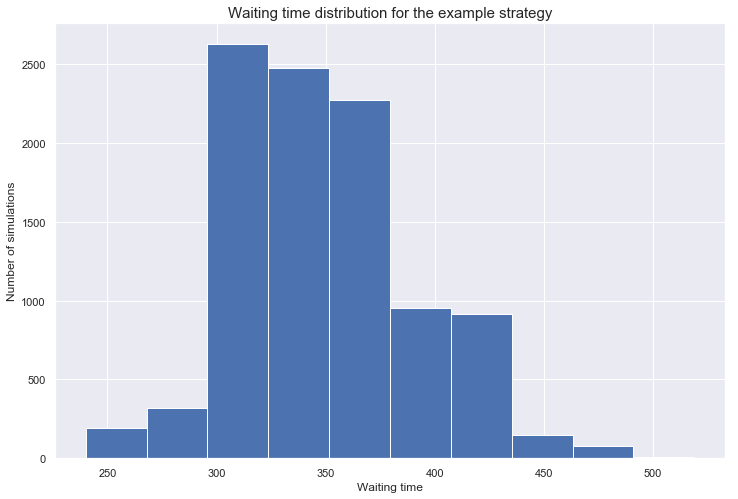

In [67]:
exa_strategy = []
for _ in range(10**4):
    def main():
        building = Building_sim(10, 50, 5)
        exa_strategy.append(building.example_strategy())
    if __name__ == "__main__":
        main()

plt.figure(figsize=(12, 8))
plt.hist(exa_strategy)
plt.title('Waiting time distribution for the example strategy',
         fontsize = 15)
plt.xlabel('Waiting time')
plt.ylabel('Number of simulations')
plt.show()

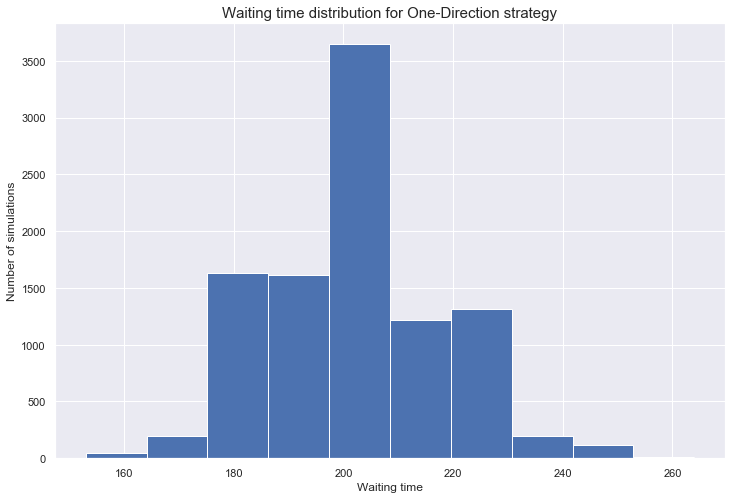

In [68]:
one_direct = []
for _ in range(10**4):
    def main():
        building = Building_sim(10, 50, 5)
        one_direct.append(building.one_direction())
    if __name__ == "__main__":
        main()
        
plt.figure(figsize=(12, 8))
plt.hist(one_direct)
plt.title('Waiting time distribution for One-Direction strategy',
         fontsize = 15)
plt.xlabel('Waiting time')
plt.ylabel('Number of simulations')
plt.show()

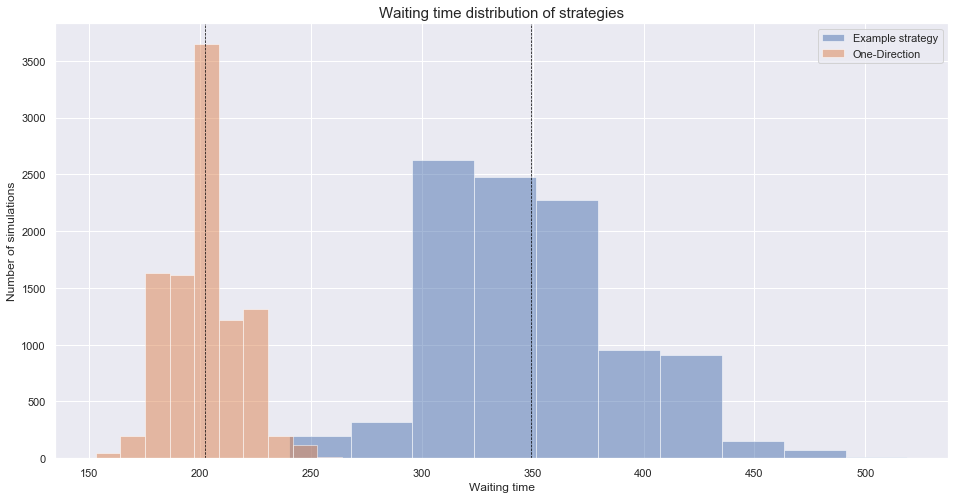

In [75]:
plt.figure(figsize=(16, 8))
plt.hist(exa_strategy, alpha=0.5, label='Example strategy')
plt.axvline(np.mean(exa_strategy), color='black', linewidth=0.7, ls='--')
plt.hist(one_direct, alpha=0.5, label='One-Direction')
plt.axvline(np.mean(one_direct), color='black', linewidth=0.7, ls='--')
plt.legend(loc='upper right')
plt.title('Waiting time distribution of strategies',
         fontsize = 15)
plt.xlabel('Waiting time')
plt.ylabel('Number of simulations')
plt.show()

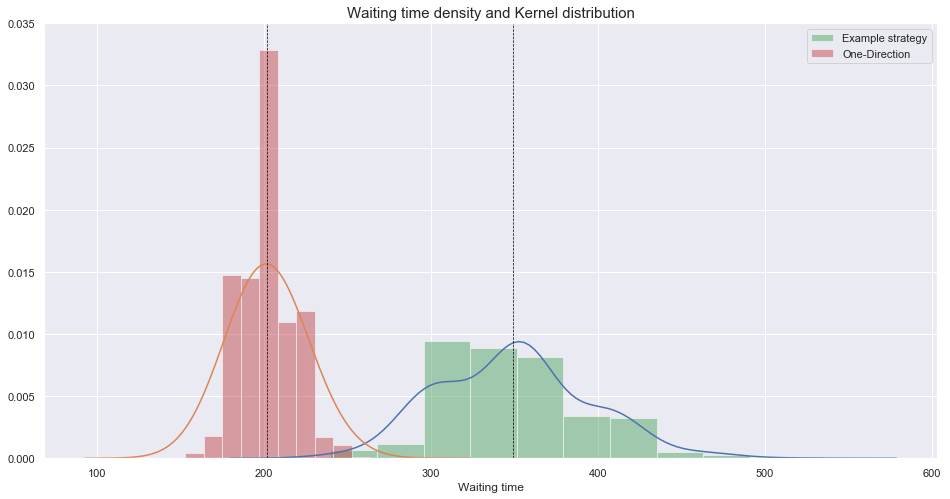

In [77]:
plt.figure(figsize=(16, 8))
sns.kdeplot(exa_strategy, bw=20)
sns.kdeplot(one_direct, bw=20)
plt.hist(exa_strategy, alpha=0.5, label='Example strategy', 
         density=True)
plt.axvline(np.mean(exa_strategy), color='black', linewidth=0.7, ls='--')
plt.hist(one_direct, alpha=0.5, label='One-Direction', 
         density=True)
plt.axvline(np.mean(one_direct), color='black', linewidth=0.7, ls='--')
plt.ylim(0, 0.035)
plt.legend(loc='upper right')
plt.title('Waiting time density and Kernel distribution',
         fontsize = 15)
plt.xlabel('Waiting time')
plt.show()

In [82]:
print('The mean waiting time for the example strategy: ', 
      np.mean(exa_strategy),
      '\nThe mean waiting time One Directional strategy: ', 
      np.mean(one_direct))

The mean waiting time for the example strategy:  349.4373 
The mean waiting time One Directional strategy:  202.2632
